TaxiFare Project

In [1]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
data.shape

(50000, 8)

In [6]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<Axes: xlabel='no_of_passenger', ylabel='count'>

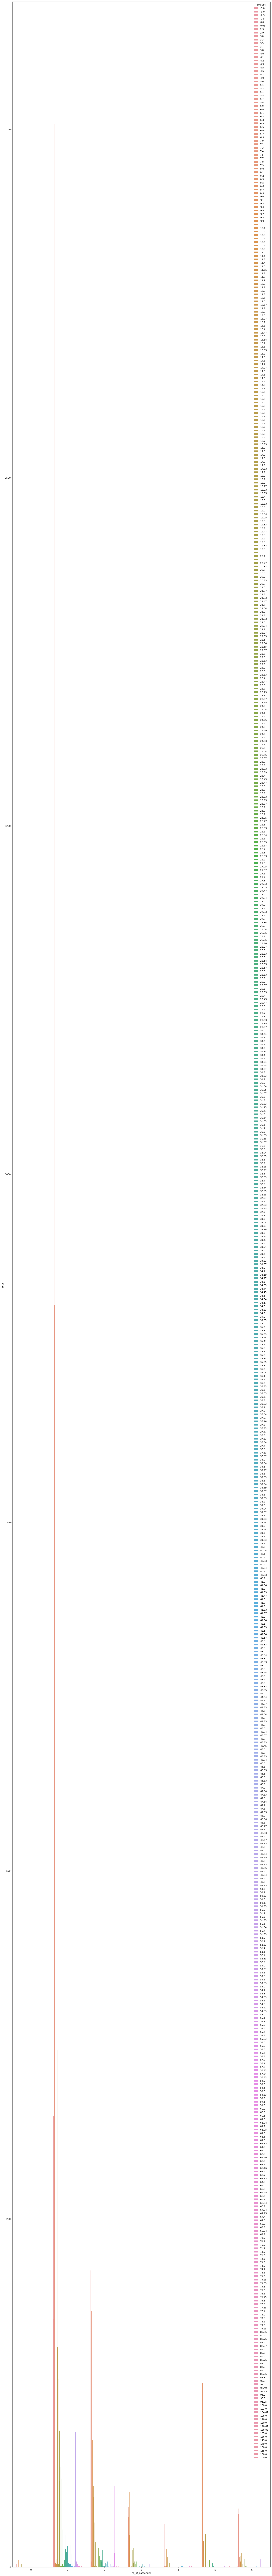

In [11]:
plt.figure(figsize=(20,200))
sns.countplot(x="no_of_passenger",hue="amount",data=data)

In [12]:
correlation_mat=data.corr()

<Axes: >

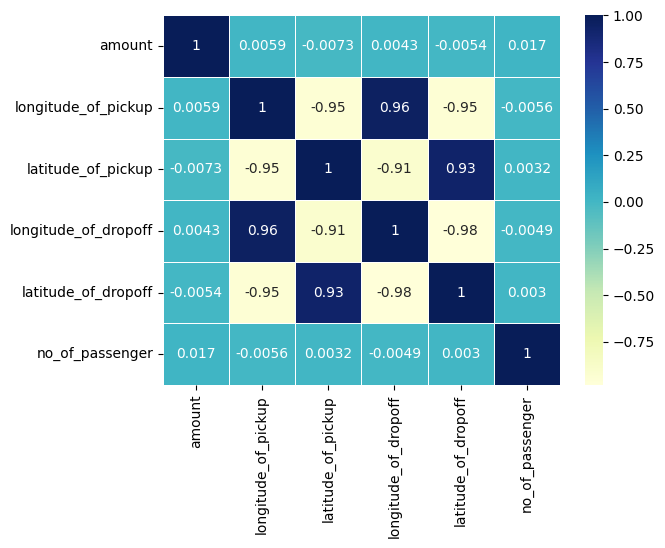

In [13]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

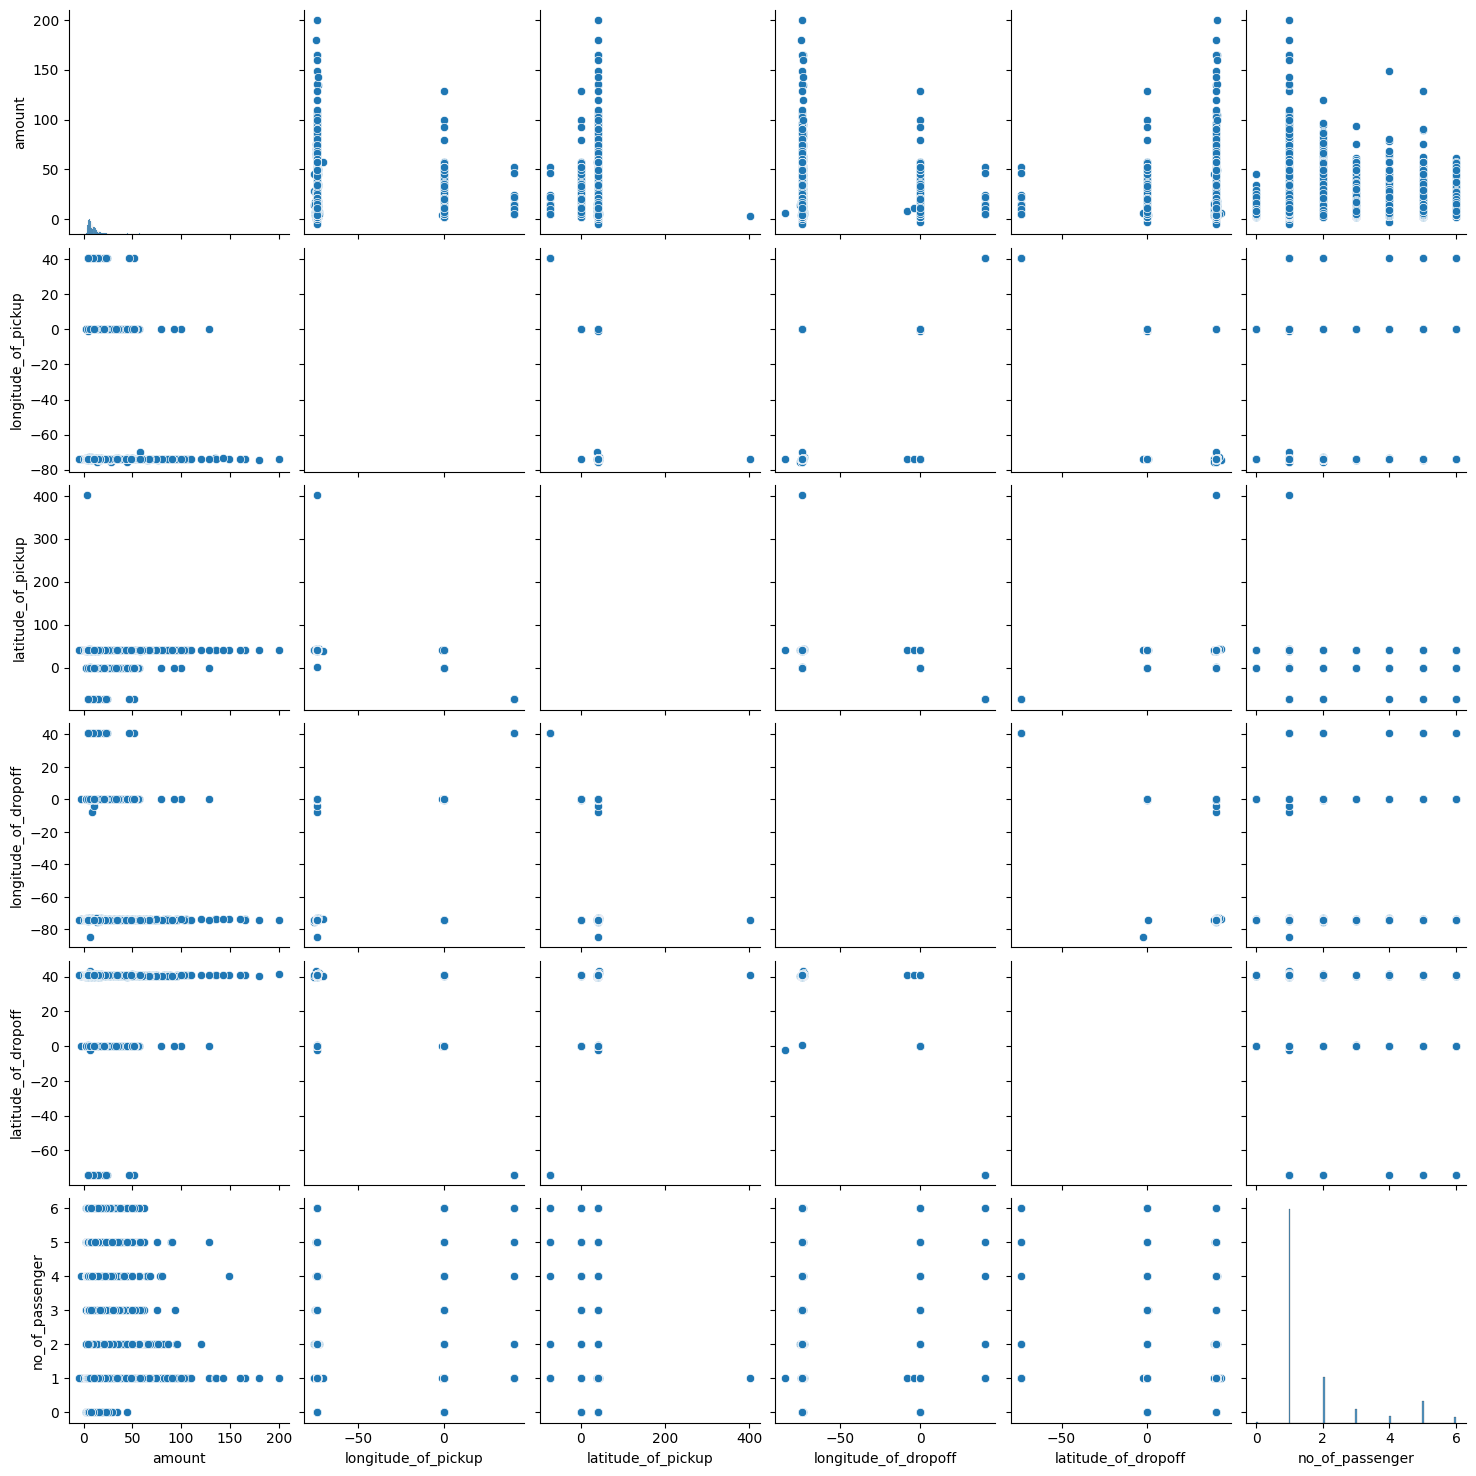

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [16]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: >

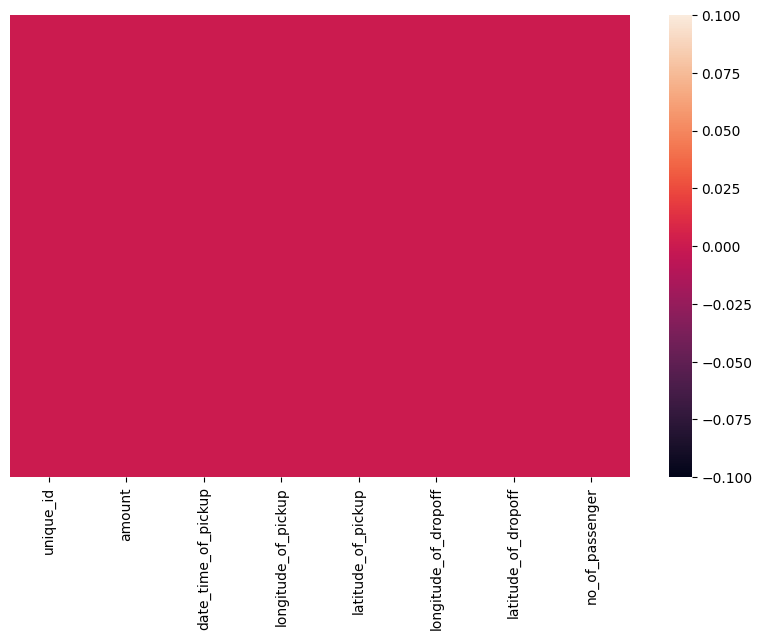

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [18]:
print(data["unique_id"].value_counts())
print(data["amount"].value_counts())
print(data["date_time_of_pickup"].value_counts())
print(data["longitude_of_pickup"].value_counts())
print(data["latitude_of_pickup"].value_counts())
print(data["longitude_of_dropoff"].value_counts())
print(data["latitude_of_dropoff"].value_counts())
print(data["no_of_passenger"].value_counts())

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
56:16.0      1
40:52.0      1
53:10.0      1
15:21.0      1
53:22.0      1
Name: unique_id, Length: 3597, dtype: int64
6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64
2011-09-03 01:30:00 UTC    3
2014-05-30 23:38:00 UTC    3
2012-06-28 20:54:00 UTC    3
2011-02-11 13:19:00 UTC    3
2014-05-30 10:50:00 UTC    2
                          ..
2011-10-07 00:24:25 UTC    1
2015-04-02 06:47:05 UTC    1
2011-01-09 10:09:58 UTC    1
2012-10-27 18:11:00 UTC    1
2010-01-13 08:13:14 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64
 0.000000     955
-73.137393     18
-73.981405      9
-73.980947      8
-73.982268      8
             ... 
-73.969862      1
-73.988610      1
-74.000758      1
-73.969658      1
-73.932603      1
Name: longitude_of_pickup

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


<Axes: >

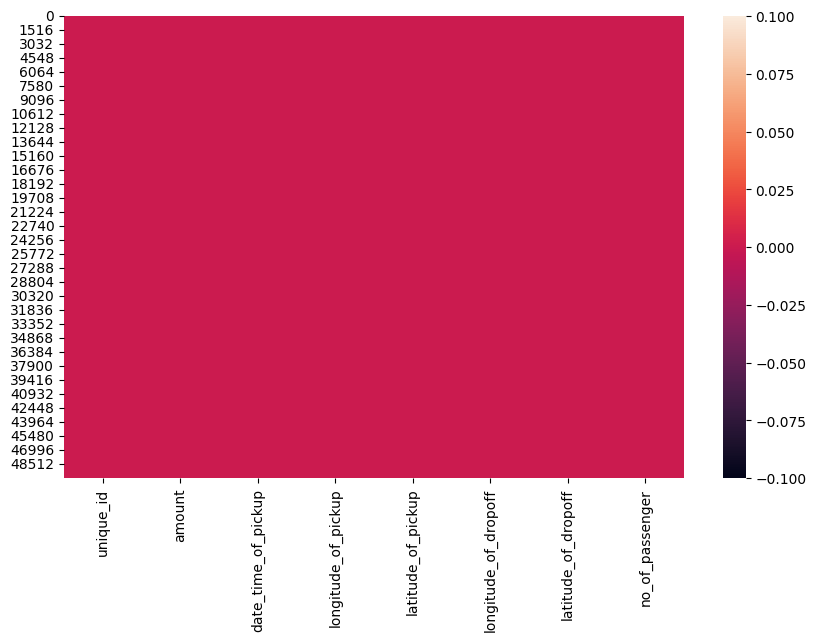

In [19]:
#filling all Nan values with mode of respective variable
data["unique_id"].fillna(data["unique_id"].mode()[0],inplace=True)
data["date_time_of_pickup"].fillna(data["date_time_of_pickup"].mode()[0],inplace=True)
data["longitude_of_pickup"].fillna(data["longitude_of_pickup"].mode()[0],inplace=True)
data["latitude_of_pickup"].fillna(data["latitude_of_pickup"].mode()[0],inplace=True)
data["longitude_of_dropoff"].fillna(data["longitude_of_dropoff"].mode()[0],inplace=True)
data["latitude_of_dropoff"].fillna(data["latitude_of_dropoff"].mode()[0],inplace=True)

data["no_of_passenger"].fillna(data["no_of_passenger"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [20]:
data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [21]:
data["date_time_of_pickup"] = le.fit_transform(data["date_time_of_pickup"])
data["longitude_of_pickup"] = le.fit_transform(data["longitude_of_pickup"])
data["latitude_of_pickup"] = le.fit_transform(data["latitude_of_pickup"])
data["longitude_of_dropoff"] = le.fit_transform(data["longitude_of_dropoff"])
data["latitude_of_dropoff"] = le.fit_transform(data["latitude_of_dropoff"])
data["amount"] = le.fit_transform(data["amount"])

data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,17,3408,32913,4718,34163,3755,1
1,52:16.0,126,7748,229,2538,17220,32614,1
2,35:00.0,26,20152,15336,23202,9314,17434,2
3,30:42.0,43,25488,12489,8950,9084,21594,1
4,51:00.0,23,8973,23780,26962,27542,33156,1


In [22]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["amount","unique_id"],axis=1)
y = data["amount"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
####LINEAR REGRESSION

In [25]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [26]:
model_1.score(X_train,y_train)

0.09528866995968954

In [27]:
model_1.score(X_test,y_test)

0.10584645950134652

In [28]:
####LOGISTIC REGRESSION MODEL

In [29]:
model = LogisticRegression(solver="liblinear")

In [30]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [31]:
model.score(X_train,y_train)

0.04831428571428571

In [32]:
model.score(X_test,y_test)

0.047933333333333335

In [33]:
####DECISION TREE MODEL

In [34]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
dtree.score(X_train,y_train)

1.0

In [36]:
dtree.score(X_test,y_test)

0.08093333333333333

In [37]:
dTreeR = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.05651428571428571


In [38]:
y_predict = dTreeR.predict(X_test)

In [39]:
print(dTreeR.score(X_test, y_test))

0.055733333333333336


In [40]:
from sklearn import metrics

<Axes: >

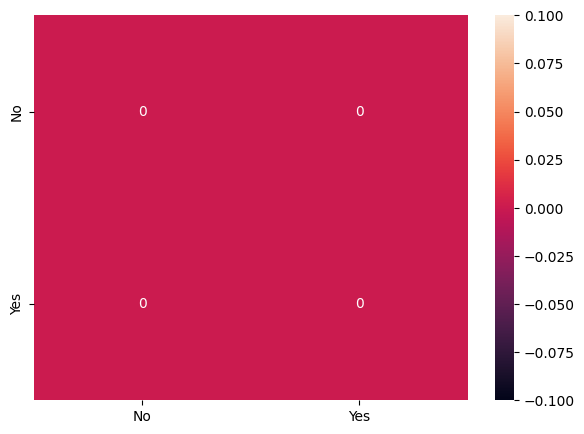

In [41]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in["No","Yes"]],
                     columns = [i for i in["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [42]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
print(bgcl.score(X_train,y_train))
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.056685714285714284
0.0562


<Axes: >

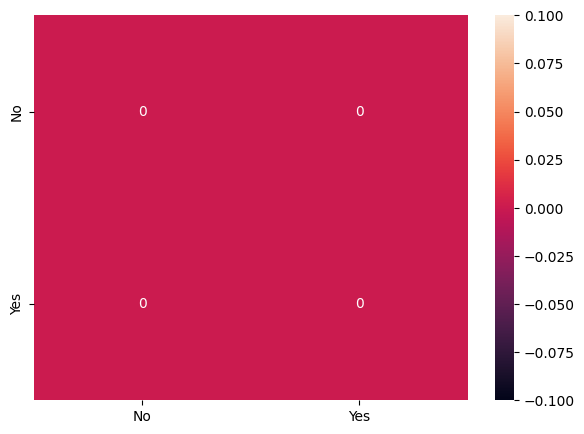

In [43]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in["No","Yes"]],
                     columns = [i for i in["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=120,random_state=0)
abcl = abcl.fit(X_train,y_train)
print(abcl.score(X_train,y_train))
y_predict = abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.05008571428571429
0.05006666666666667


<Axes: >

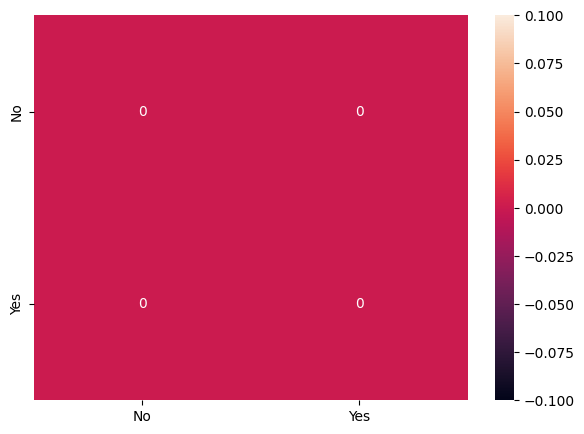

In [45]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in["No","Yes"]],
                     columns = [i for i in["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#kernal crashing while executing Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=200,random_state=0)
gbcl = gbcl.fit(X_train,y_train)
print(gbcl.score(X_train,y_train))
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

In [47]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in["No","Yes"]],
                    columns = [i for i in["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=160,random_state=0,max_features=3)
rfcl = rfcl.fit(X_train,y_train)
print(rfcl.score(X_train,y_train))
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))

In [ ]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in["No","Yes"]],
                     columns = [i for i in["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1]:
from scipy.stats import zscore

In [ ]:
XScaled = X.apply(zscore)#convert all attributes to Z scale
XScaled.describe()

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance',metric='euclidean')

In [ ]:
NNH.fit(XScaled,y)